## Pandemi Covid-19

Covid19 adalah pandemi yang sudah mewabah ke seluruh dunia. Sebagian besar negara-negara di dunia sudah terjangkit. Penanganan tiap-tiap negara pun berbeda, sesuai dengan kebijakan pemerintah. Hal ini mengakibatkan perbedaan trend kenaikan atau penurunan kasus covid berbeda-beda tiap negara.

In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

import requests

### 1. Membaca dan Mengecek Data Covid-19

In [2]:
covid_url = "https://dqlab.id/data/covid19_worldwide_2020.json"
df_covid_worldwide = pd.read_json(covid_url)

In [3]:
print("Ukuran dataset: %d kolom dan %d baris.\n" % df_covid_worldwide.shape)

Ukuran dataset: 61900 kolom dan 6 baris.



In [4]:
print("Lima data teratas:\n")
df_covid_worldwide.head()

Lima data teratas:



,date,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths,geo_id
0,2020-03-20,1,0,1,0,TD
1,2020-03-21,0,0,1,0,TD
2,2020-03-22,1,0,2,0,TD
3,2020-03-23,0,0,2,0,TD
4,2020-03-24,0,0,2,0,TD


In [5]:
print("\nLima data terbawah:\n")
df_covid_worldwide.tail()


Lima data terbawah:



,date,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths,geo_id
61895,2020-02-24,57,1,691,3,JPG11668
61896,2020-02-26,0,1,691,4,JPG11668
61897,2020-03-10,-9,1,696,7,JPG11668
61898,2020-02-20,79,2,621,2,JPG11668
61899,2020-02-29,0,2,705,6,JPG11668


In [6]:
print("Informasi data frame awal:")
df_covid_worldwide.info()

Informasi data frame awal:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 61900 entries, 0 to 61899
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   61900 non-null  datetime64[ns]
 1   daily_confirmed_cases  61900 non-null  int64         
 2   daily_deaths           61900 non-null  int64         
 3   confirmed_cases        61900 non-null  int64         
 4   deaths                 61900 non-null  int64         
 5   geo_id                 61625 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 3.3+ MB


In [7]:
df_covid_worldwide = df_covid_worldwide.set_index("date").sort_index()
df_covid_worldwide

,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths,geo_id
date,,,,,
2019-12-31,0,0,0,0,IN
2019-12-31,0,0,0,0,IR
2019-12-31,0,0,0,0,PK
2019-12-31,0,0,0,0,AM
2019-12-31,27,0,27,0,CN
...,...,...,...,...,...
2020-12-14,528,1,9708,92,UY
2020-12-14,26,0,69,0,GD
2020-12-14,0,0,11101,166,MT


### 2. Cek Missing Value

In [8]:
print("Jumlah missing value tiap kolom:")
print(df_covid_worldwide.isna().sum())

Jumlah missing value tiap kolom:
daily_confirmed_cases      0
daily_deaths               0
confirmed_cases            0
deaths                     0
geo_id                   275
dtype: int64


In [9]:
df_covid_worldwide.dropna(inplace=True)

In [10]:
print("\nJumlah missing value tiap kolom setelah didrop:")
print(df_covid_worldwide.isna().sum())


Jumlah missing value tiap kolom setelah didrop:
daily_confirmed_cases    0
daily_deaths             0
confirmed_cases          0
deaths                   0
geo_id                   0
dtype: int64


### 3. Membaca Data Countries

In [11]:
countries_url = "https://dqlab.id/data/country_details.json"
df_countries = pd.read_json(countries_url)

In [12]:
df_countries.head()

,geo_id,country_name
0,TD,Chad
1,CU,Cuba
2,FJ,Fiji
3,GU,Guam
4,IR,Iran


### 4. Merge Data Covid-19 dan Countries

In [13]:
df_covid_denormalized = pd.merge(df_covid_worldwide.reset_index(),df_countries,on="geo_id").set_index("date")
df_covid_denormalized.head()

,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths,geo_id,country_name
date,,,,,,
2019-12-31,0,0,0,0,IN,India
2020-01-01,0,0,0,0,IN,India
2020-01-02,0,0,0,0,IN,India
2020-01-03,0,0,0,0,IN,India
2020-01-04,0,0,0,0,IN,India


### 5. Menghitung Fatality Rate

In [14]:
df_covid_denormalized["fatality_ratio"] = df_covid_denormalized["deaths"]/df_covid_denormalized["confirmed_cases"]

In [15]:
df_covid_denormalized.head()

,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths,geo_id,country_name,fatality_ratio
date,,,,,,,
2019-12-31,0,0,0,0,IN,India,NaN
2020-01-01,0,0,0,0,IN,India,NaN
2020-01-02,0,0,0,0,IN,India,NaN
2020-01-03,0,0,0,0,IN,India,NaN
2020-01-04,0,0,0,0,IN,India,NaN


In [16]:
df_top_20_fatality_rate = df_covid_denormalized.sort_values("fatality_ratio", ascending=False).head(20)
df_top_20_fatality_rate[["geo_id","country_name","fatality_ratio"]]

,geo_id,country_name,fatality_ratio
date,,,
2020-03-15,SD,Sudan,1.0
2020-02-20,IR,Iran,1.0
2020-03-16,GT,Guatemala,1.0
2020-03-13,GY,Guyana,1.0
2020-03-18,SD,Sudan,1.0
2020-03-17,SD,Sudan,1.0
2020-03-16,SD,Sudan,1.0
2020-02-03,PH,Philippines,0.5
2020-02-05,PH,Philippines,0.5


### Cek fatality rate pada bulan Agustus 2020

In [17]:
df_covid_denormalized_august = df_covid_denormalized.loc["2020-08"].groupby("country_name").sum()

In [18]:
df_covid_denormalized_august["fatality_ratio"] = df_covid_denormalized_august["deaths"]/df_covid_denormalized_august["confirmed_cases"]

In [19]:
df_top_20_fatality_rate_on_august = df_covid_denormalized_august.sort_values(by="fatality_ratio", ascending=False).head(20)
df_top_20_fatality_rate_on_august["fatality_ratio"]

country_name
Yemen                     0.286473
Italy                     0.138619
France                    0.137979
United_Kingdom            0.130228
Belgium                   0.125079
Hungary                   0.122820
Netherlands               0.099309
Mexico                    0.099092
Jersey                    0.088677
Spain                     0.079746
Chad                      0.078870
Montserrat                0.076923
Canada                    0.073963
Sweden                    0.071475
Isle_of_Man               0.071429
British_Virgin_Islands    0.066239
Ireland                   0.065030
Sudan                     0.064250
Liberia                   0.063944
Ecuador                   0.061031
Name: fatality_ratio, dtype: float64

### 5. Visualisasi Negara dengan Fatality Rate Tertinggi pada Bulan Agustus 2020

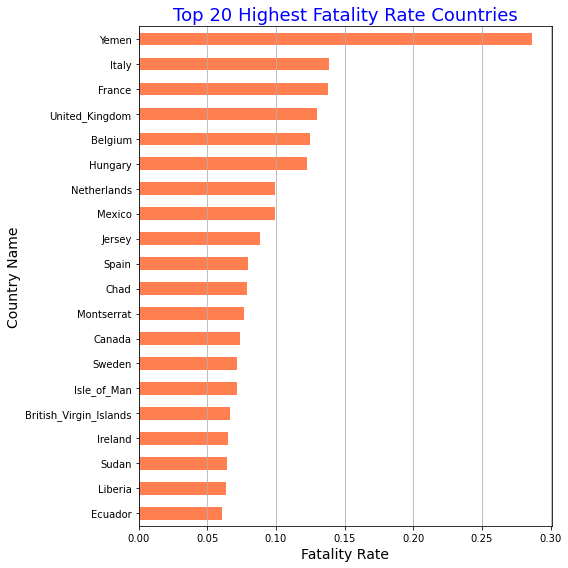

In [20]:
plt.figure(figsize=(8,8))
df_top_20_fatality_rate_on_august["fatality_ratio"].sort_values().plot(kind="barh", color="coral")
plt.title("Top 20 Highest Fatality Rate Countries", fontsize=18, color="b")
plt.xlabel("Fatality Rate", fontsize=14)
plt.ylabel("Country Name", fontsize=14)
plt.grid(axis="x")
plt.tight_layout()
plt.show()

### 6. Cek Data ASEAN

In [21]:
asean_country_id = ["ID", "MY", "SG", "TH", "VN"]
filter_list = [(df_covid_denormalized["geo_id"]==country_id).to_numpy() for country_id in asean_country_id]
filter_array = np.column_stack(filter_list).sum(axis=1, dtype="bool")
df_covid_denormalized_asean = df_covid_denormalized[filter_array].sort_index()

In [22]:
print("Cek nilai unik di kolom 'country_name':", df_covid_denormalized_asean["country_name"].unique())

Cek nilai unik di kolom 'country_name': ['Malaysia' 'Vietnam' 'Thailand' 'Singapore' 'Indonesia']


In [23]:
df_covid_denormalized_asean.head()

,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths,geo_id,country_name,fatality_ratio
date,,,,,,,
2019-12-31,0,0,0,0,MY,Malaysia,NaN
2019-12-31,0,0,0,0,VN,Vietnam,NaN
2019-12-31,0,0,0,0,TH,Thailand,NaN
2019-12-31,0,0,0,0,SG,Singapore,NaN
2019-12-31,0,0,0,0,ID,Indonesia,NaN


In [24]:
#Cek kasus pertama di setiap negara
print("Kasus pertama yang muncul terkonfirmasi pada 5 negara ASEAN:")
for country_id in asean_country_id:
    asean_country = df_covid_denormalized_asean[df_covid_denormalized_asean["geo_id"]==country_id]
    first_case = asean_country[asean_country["confirmed_cases"]>0][["confirmed_cases","geo_id","country_name"]]
    print(first_case.head(1))

Kasus pertama yang muncul terkonfirmasi pada 5 negara ASEAN:
            confirmed_cases geo_id country_name
date                                           
2020-03-02                2     ID    Indonesia
            confirmed_cases geo_id country_name
date                                           
2020-01-25                3     MY     Malaysia
            confirmed_cases geo_id country_name
date                                           
2020-01-24                3     SG    Singapore
            confirmed_cases geo_id country_name
date                                           
2020-01-13                1     TH     Thailand
            confirmed_cases geo_id country_name
date                                           
2020-01-24                2     VN      Vietnam


In [25]:
# Kasus Covid ASEAN di Bulan Maret
df_covid_denormalized_asean_march_onward = df_covid_denormalized_asean[df_covid_denormalized_asean.index>="2020-03-01"]
df_covid_denormalized_asean_march_onward.head()

,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths,geo_id,country_name,fatality_ratio
date,,,,,,,
2020-03-01,0,1,42,1,TH,Thailand,0.02381
2020-03-01,4,0,102,0,SG,Singapore,0.00000
2020-03-01,0,0,16,0,VN,Vietnam,0.00000
2020-03-01,0,0,0,0,ID,Indonesia,NaN
2020-03-01,0,0,25,0,MY,Malaysia,0.00000


In [26]:
new_df=df_covid_denormalized_asean_march_onward.reset_index()

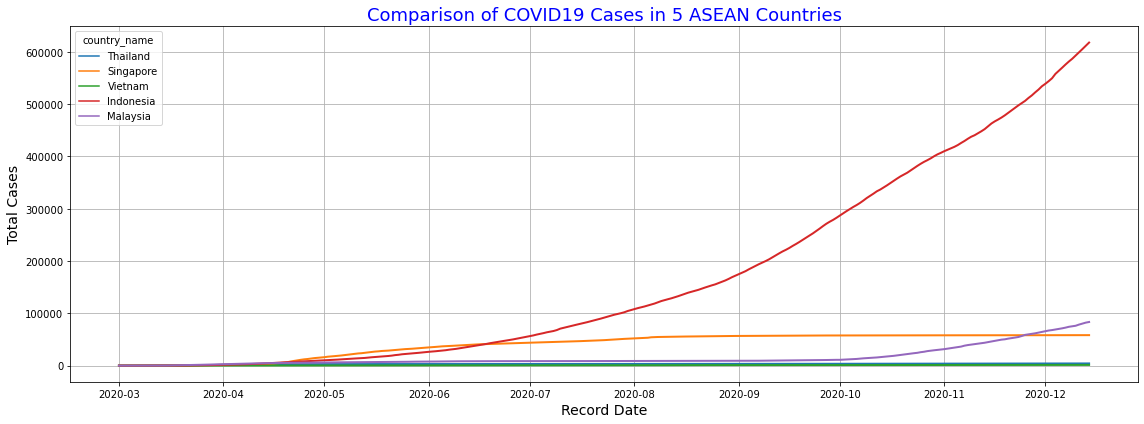

In [27]:
# Visualisasi perbandingan kasus covid-19 di 5 negara ASEAN
plt.figure(figsize=(16,6))
sns.lineplot(data=new_df, 
             x="date", 
             y="confirmed_cases", 
             hue="country_name",
             linewidth=2)
plt.xlabel('Record Date', fontsize=14)
plt.ylabel('Total Cases', fontsize=14)
plt.title('Comparison of COVID19 Cases in 5 ASEAN Countries', color="b", fontsize=18)
plt.grid()
plt.tight_layout()
plt.show()

Selanjutnya, kita mencoba mengeksplor data covid-19 lain, yaitu data di Indonesia

## Covid-19 di Indonesia

COVID-19 merupakan penyakit yang saat ini telah menjadi pandemi secara global. Kondisi menjadi semakin mengkhawatirkan karena hingga detik ini masih belum ditemukan vaksin yang efektif untuk virus penyebab COVID-19. Pemerintah di berbagai negara umumnya dengan sigap membentuk gugus tugas (task force unit) untuk menangani penyebaran COVID-19 di masyarakat, termasuk pemerintah di Indonesia.

Salah satu bentuk aksi yang dilakukan oleh pemerintah adalah dengan mengumpulkan dan menyediakan data pertumbuhan kasus COVID-19 kepada publik. Data pertumbuhan kasus tersebut tidak jarang juga dilengkapi dengan dasbor dan grafik visualisasi pendukung dengan harapan masyarakat dapat memahami informasi dengan lebih mudah. Sebagai contoh adalah portal covid19.go.id besutan Gugus Tugas Penanganan COVID-19 Nasional dan portal PIKOBAR milik pemerintah Provinsi Jawa Barat. Serta banyak portal data COVID-19 lainnya yang disediakan oleh masing-masing pemerintah daerah.

### Membaca data covid Indonesia

In [28]:
resp = requests.get('https://data.covid19.go.id/public/api/update.json', verify=False)
cov_id_raw = resp.json()
cov_id_update = cov_id_raw['update']

print('Tanggal pembaharuan data penambahan kasus :', cov_id_update['penambahan']['tanggal'])
print('Jumlah penambahan kasus sembuh :', cov_id_update['penambahan']['jumlah_sembuh'])
print('Jumlah penambahan kasus meninggal :', cov_id_update['penambahan']['jumlah_meninggal'])
print('Jumlah total kasus positif hingga saat ini :', cov_id_update['total']['jumlah_positif'])
print('Jumlah total kasus meninggal hingga saat ini :', cov_id_update['total']['jumlah_meninggal'])

Tanggal pembaharuan data penambahan kasus : 2022-04-29
Jumlah penambahan kasus sembuh : 572
Jumlah penambahan kasus meninggal : 23
Jumlah total kasus positif hingga saat ini : 6046467
Jumlah total kasus meninggal hingga saat ini : 156240


C:\Users\kana\Anaconda3\envs\tensorflow_env\lib\site-packages\urllib3\connectionpool.py:988: InsecureRequestWarning: Unverified HTTPS request is being made to host 'data.covid19.go.id'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


### Membaca data covid di Jawa Barat

In [29]:
resp_jabar = requests.get('https://data.covid19.go.id/public/api/prov_detail_JAWA_BARAT.json', verify=False)
cov_jabar_raw = resp_jabar.json()

print('Nama-nama elemen utama:\n', cov_jabar_raw.keys())
print('\nJumlah total kasus COVID-19 di Jawa Barat                 : %d' %cov_jabar_raw['kasus_total'])
print('Persentase kematian akibat COVID-19 di Jawa Barat         : %f.2%%' %cov_jabar_raw['meninggal_persen'])
print('Persentase tingkat kesembuhan dari COVID-19 di Jawa Barat : %f.2%%' %cov_jabar_raw['sembuh_persen'])

C:\Users\kana\Anaconda3\envs\tensorflow_env\lib\site-packages\urllib3\connectionpool.py:988: InsecureRequestWarning: Unverified HTTPS request is being made to host 'data.covid19.go.id'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


Nama-nama elemen utama:
 dict_keys(['last_date', 'provinsi', 'kasus_total', 'kasus_tanpa_tgl', 'kasus_dengan_tgl', 'meninggal_persen', 'meninggal_tanpa_tgl', 'meninggal_dengan_tgl', 'sembuh_persen', 'sembuh_tanpa_tgl', 'sembuh_dengan_tgl', 'list_perkembangan', 'data'])

Jumlah total kasus COVID-19 di Jawa Barat                 : 1105134
Persentase kematian akibat COVID-19 di Jawa Barat         : 1.425619.2%
Persentase tingkat kesembuhan dari COVID-19 di Jawa Barat : 98.283104.2%


In [30]:
# Mengecek info dan bentuk data
cov_jabar = pd.DataFrame(cov_jabar_raw['list_perkembangan'])
print('Info cov_jabar:\n', cov_jabar.info())
print('\nLima data teratas cov_jabar:\n')
cov_jabar.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785 entries, 0 to 784
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   tanggal                       785 non-null    int64
 1   KASUS                         785 non-null    int64
 2   MENINGGAL                     785 non-null    int64
 3   SEMBUH                        785 non-null    int64
 4   DIRAWAT_OR_ISOLASI            785 non-null    int64
 5   AKUMULASI_KASUS               785 non-null    int64
 6   AKUMULASI_SEMBUH              785 non-null    int64
 7   AKUMULASI_MENINGGAL           785 non-null    int64
 8   AKUMULASI_DIRAWAT_OR_ISOLASI  785 non-null    int64
dtypes: int64(9)
memory usage: 55.3 KB
Info cov_jabar:
 None

Lima data teratas cov_jabar:



,tanggal,KASUS,MENINGGAL,SEMBUH,DIRAWAT_OR_ISOLASI,AKUMULASI_KASUS,AKUMULASI_SEMBUH,AKUMULASI_MENINGGAL,AKUMULASI_DIRAWAT_OR_ISOLASI
0,1583193600000,1,1,0,0,1,0,1,0
1,1583280000000,1,0,0,1,2,0,1,1
2,1583366400000,1,0,0,1,3,0,1,2
3,1583452800000,1,0,0,1,4,0,1,3
4,1583539200000,0,0,0,0,4,0,1,3


In [31]:
# Merapikan data
cov_jabar_tidy = (cov_jabar.drop(columns=[item for item in cov_jabar.columns
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('DIRAWAT')])
                           .rename(columns=str.lower)
                           .rename(columns={'kasus': 'kasus_baru'})
                  )
cov_jabar_tidy['tanggal'] = pd.to_datetime(cov_jabar_tidy['tanggal']*1e6, unit='ns')
print('Lima data teratas:\n')
cov_jabar_tidy.head()

Lima data teratas:



,tanggal,kasus_baru,meninggal,sembuh
0,2020-03-03,1,1,0
1,2020-03-04,1,0,0
2,2020-03-05,1,0,0
3,2020-03-06,1,0,0
4,2020-03-07,0,0,0


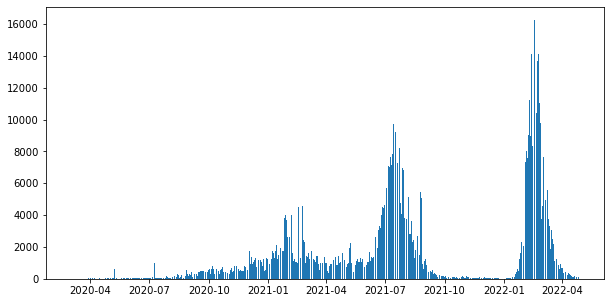

In [32]:
#Visualisasi keseluruhan data kasus baru covid
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='kasus_baru')
plt.show()

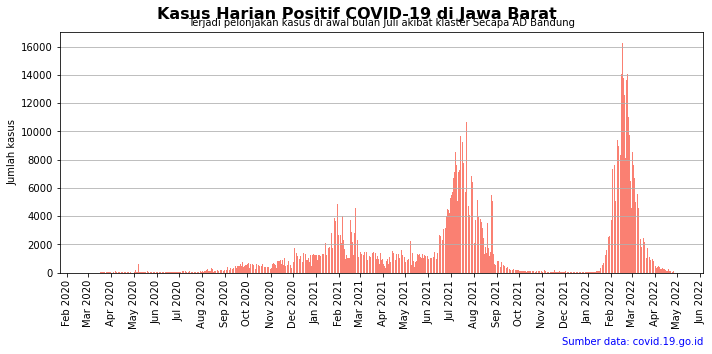

In [33]:
#Visualisasi kasus harian positif di Jawa Barat
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='kasus_baru', color='salmon')
fig.suptitle('Kasus Harian Positif COVID-19 di Jawa Barat', 
             y=1.00, fontsize=16, fontweight='bold', ha='center')
ax.set_title('Terjadi pelonjakan kasus di awal bulan Juli akibat klaster Secapa AD Bandung',
             fontsize=10)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

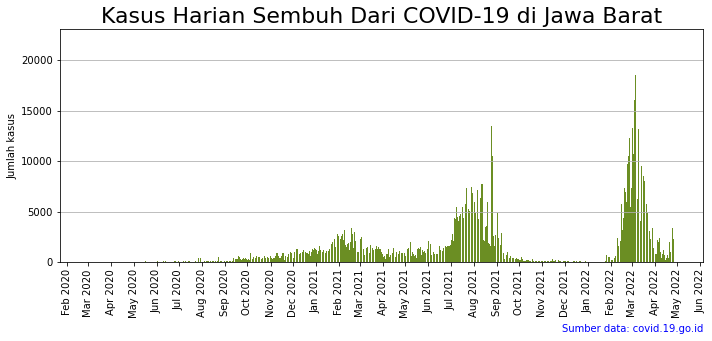

In [34]:
#Visualisasi kasus harian sembuh di Jawa Barat
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='sembuh', color='olivedrab')
ax.set_title('Kasus Harian Sembuh Dari COVID-19 di Jawa Barat',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

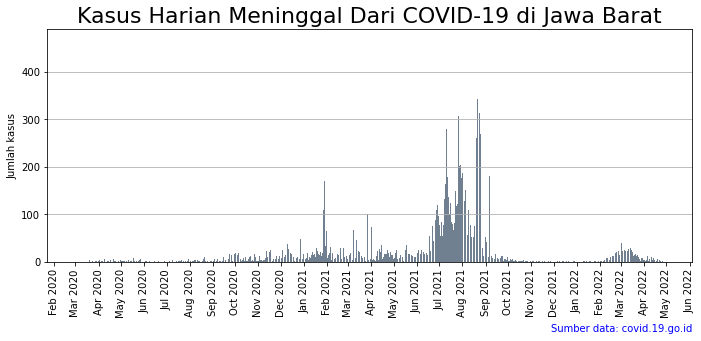

In [35]:
#Visualisasi kasus harian meninggal di Jawa Barat
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='meninggal', color='slategrey')
ax.set_title('Kasus Harian Meninggal Dari COVID-19 di Jawa Barat',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [36]:
#Merapikan data menjadi per pekan
cov_jabar_pekanan = (cov_jabar_tidy.set_index('tanggal')['kasus_baru']
                                   .resample('W')
                                   .sum()
                                   .reset_index()
                                   .rename(columns={'kasus_baru': 'jumlah'})
                    )
cov_jabar_pekanan['tahun'] = cov_jabar_pekanan['tanggal'].apply(lambda x: x.year)
cov_jabar_pekanan['pekan_ke'] =cov_jabar_pekanan['tanggal'].apply(lambda x: x.weekofyear)
cov_jabar_pekanan = cov_jabar_pekanan[['tahun', 'pekan_ke', 'jumlah']]

print('Info cov_jabar_pekanan:')
print(cov_jabar_pekanan.info())
print('\nLima data teratas cov_jabar_pekanan:\n')
cov_jabar_pekanan.head()

Info cov_jabar_pekanan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   tahun     113 non-null    int64
 1   pekan_ke  113 non-null    int64
 2   jumlah    113 non-null    int64
dtypes: int64(3)
memory usage: 2.8 KB
None

Lima data teratas cov_jabar_pekanan:



,tahun,pekan_ke,jumlah
0,2020,10,4
1,2020,11,5
2,2020,12,44
3,2020,13,80
4,2020,14,89


In [37]:
#Menambah kolom baru untuk membandingkan tiap pekan
cov_jabar_pekanan['jumlah_pekanlalu'] = cov_jabar_pekanan['jumlah'].shift().replace(np.nan, 0).astype(np.int)
cov_jabar_pekanan['lebih_baik'] = cov_jabar_pekanan['jumlah'] < cov_jabar_pekanan['jumlah_pekanlalu']

print('Sepuluh data teratas:\n')
cov_jabar_pekanan.head(10)

Sepuluh data teratas:



C:\Users\kana\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


,tahun,pekan_ke,jumlah,jumlah_pekanlalu,lebih_baik
0,2020,10,4,0,False
1,2020,11,5,4,False
2,2020,12,44,5,False
3,2020,13,80,44,False
4,2020,14,89,80,False
5,2020,15,176,89,False
6,2020,16,203,176,False
7,2020,17,136,203,True
8,2020,18,100,136,True
9,2020,19,914,100,False


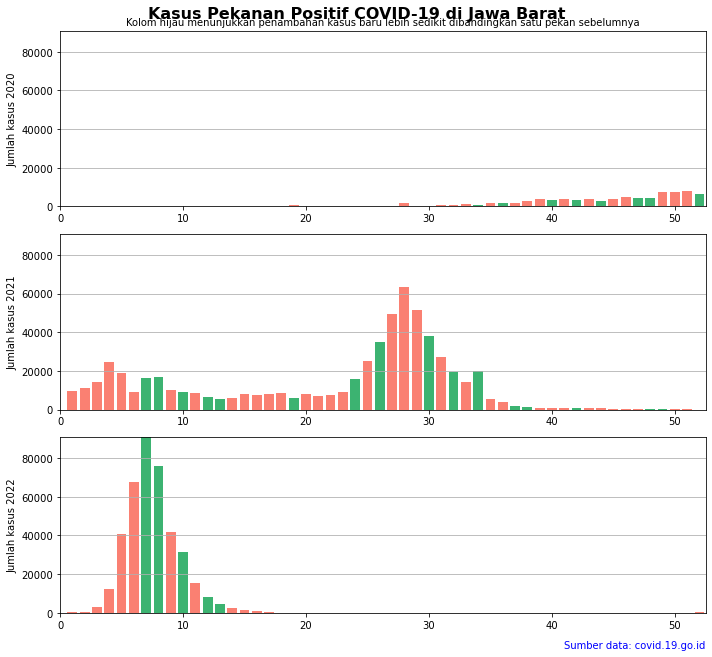

In [38]:
#Visualisasi kasus pekanan positif di Jawa Barat
jml_tahun_terjadi_covid19 = cov_jabar_pekanan['tahun'].nunique()
tahun_terjadi_covid19 = cov_jabar_pekanan['tahun'].unique()
fig, axes = plt.subplots(nrows=jml_tahun_terjadi_covid19, 
                         figsize=(10,3*jml_tahun_terjadi_covid19))

fig.suptitle('Kasus Pekanan Positif COVID-19 di Jawa Barat', 
             y=1.00, fontsize=16, fontweight='bold', ha='center')
for i, ax in enumerate(axes):
    ax.bar(data=cov_jabar_pekanan.loc[cov_jabar_pekanan['tahun']==tahun_terjadi_covid19[i]], 
           x='pekan_ke', height='jumlah', 
           color=['mediumseagreen' if x is True else 'salmon' 
                  for x in cov_jabar_pekanan['lebih_baik']])
    if i == 0:
        ax.set_title('Kolom hijau menunjukkan penambahan kasus baru lebih sedikit dibandingkan satu pekan sebelumnya',
                     fontsize=10)
    elif i == jml_tahun_terjadi_covid19-1:
        ax.text(1, -0.2, 'Sumber data: covid.19.go.id', color='blue',
            ha='right', transform=ax.transAxes)

    ax.set_xlim([0, 52.5])
    ax.set_ylim([0, max(cov_jabar_pekanan['jumlah'])])
    ax.set_xlabel('')
    ax.set_ylabel('Jumlah kasus %d'%(tahun_terjadi_covid19[i],))
    ax.grid(axis='y')

plt.tight_layout()
plt.show()

In [39]:
cov_jabar_akumulasi = cov_jabar_tidy[['tanggal']].copy()
cov_jabar_akumulasi['akumulasi_aktif'] = (cov_jabar_tidy['kasus_baru'] - cov_jabar_tidy['sembuh'] - cov_jabar_tidy['meninggal']).cumsum()
cov_jabar_akumulasi['akumulasi_sembuh'] = cov_jabar_tidy['sembuh'].cumsum()
cov_jabar_akumulasi['akumulasi_meninggal'] = cov_jabar_tidy['meninggal'].cumsum()
print(cov_jabar_akumulasi.tail())

       tanggal  akumulasi_aktif  akumulasi_sembuh  akumulasi_meninggal
780 2022-04-22            10753           1078344                15735
781 2022-04-23             9882           1079297                15737
782 2022-04-24             8709           1080519                15748
783 2022-04-25             5428           1083851                15751
784 2022-04-26             3253           1086129                15752


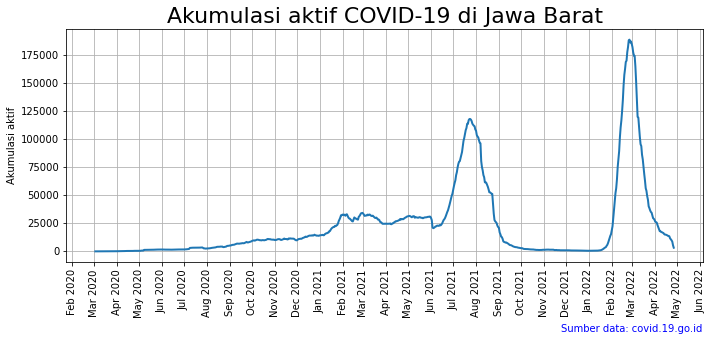

In [40]:
#Visualisasi akumulasi kasus aktif di Jawa Barat
fig, ax = plt.subplots(figsize=(10,5))
ax.plot('tanggal', 'akumulasi_aktif', data=cov_jabar_akumulasi, lw=2)

ax.set_title('Akumulasi aktif COVID-19 di Jawa Barat',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Akumulasi aktif')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid()
plt.tight_layout()
plt.show()

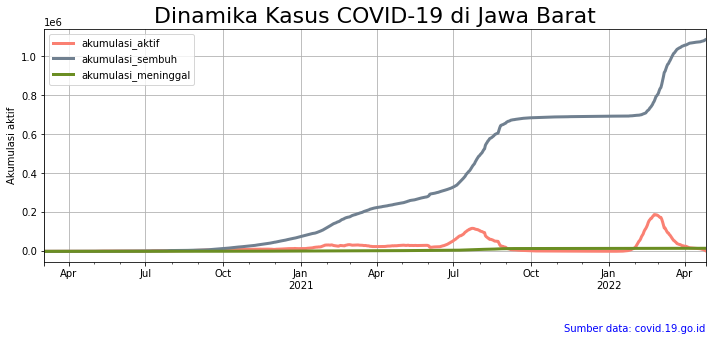

In [41]:
#Visualisasi dinamika kasus covid di Jawa Barat
fig, ax = plt.subplots(figsize=(10,5))
cov_jabar_akumulasi_ts = cov_jabar_akumulasi.set_index('tanggal')
cov_jabar_akumulasi_ts.plot(kind='line', ax=ax, lw=3,
                            color=['salmon', 'slategrey', 'olivedrab'])

ax.set_title('Dinamika Kasus COVID-19 di Jawa Barat',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Akumulasi aktif')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)

plt.grid()
plt.tight_layout()
plt.show()